<a href="https://colab.research.google.com/github/Mirilh/Clasificador_flor_Iris/blob/main/IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crear un clasificador que segun el pétalo y el sepalo nos diga que tipo de planta Iris tenemos.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Herramienta de visualización


In [28]:
iris = pd.read_csv('2_IrisSpecies.csv')

In [29]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [31]:
# Eliminamos la 1 columna que son IDs con informacion irrelevante
iris = iris.drop("Id", axis=1)


Graficamos para conocer los datos dataset

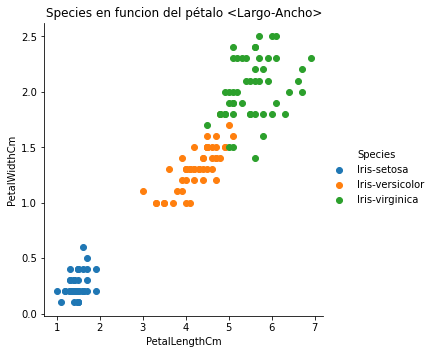

In [32]:
# Con seaborn ploteamos para ver los datos que tenemos.

sns.FacetGrid(iris, hue='Species', height=4.8) \
              .map(plt.scatter,'PetalLengthCm', 'PetalWidthCm')\
              .add_legend()

plt.title('Species en funcion del pétalo <Largo-Ancho>')
plt.show()

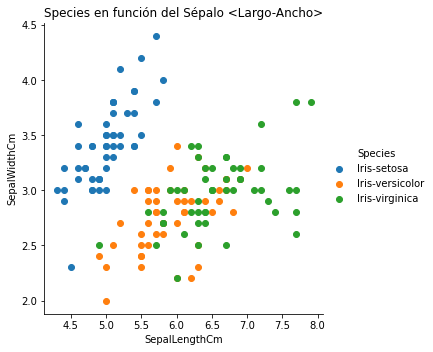

In [33]:
sns.FacetGrid(iris, hue='Species', height=4.8)\
              .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
              .add_legend()

plt.title('Species en función del Sépalo <Largo-Ancho>')
plt.show()

Convertir la ultima columna a 0,1,2 lenguaje máquina en vez de texto, variables categóricas

In [34]:
#Usamos .map() para recorrer todo el df y convertir texto en nº
iris.Species = iris.Species.map({'Iris-setosa': 0, 
                                 'Iris-versicolor' : 1, 
                                 'Iris-virginica' :2 })
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
# .tolist me permite transformar la info en lista
print(np.array(iris.Species.tolist()))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Vamos a definir X e Y

*   X = SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
*  Y = Species



In [36]:
#Borrar del eje X (1) el columna 'Species' y me quedo con las otras
X = iris.drop('Species', axis = 1) 
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
# Le digo que Y esta formado solo por la columna Species del df iris
Y = iris['Species']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [38]:
X = X.values
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [39]:
Y = Y.values
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Divido los datos para entrenamiento y prueba (TRAIN-TEST)
- 80% para train (entrenamiento): 80% de 150 = 120
- 20% para test (prueba) : 20% de 150 = 30
- test_size=0.80 indica el 80%
- random_state=0 sirve para obtener siempre el mismo resultado

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train , X_test , y_train , y_test = train_test_split(X,Y, test_size = 0.8 , random_state = 0)

In [42]:
X_train

array([[5.8, 4. , 1.2, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.1, 3.8, 1.5, 0.3],
       [4.7, 3.2, 1.6, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [5.7, 2.8, 4.1, 1.3],
       [5.8, 2.7, 3.9, 1.2],
       [5.7, 2.6, 3.5, 1. ],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5. , 3. , 1.6, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.7, 3.1, 5.6, 2.4],
       [5.8, 2.7, 5.1, 1.9],
       [5.1, 3.4, 1.5, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [5.5, 3.5, 1.3, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [6.3, 2.9, 5.6, 1.8],
       [5.8, 2.7, 4.1, 1. ],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2]])

Primera predicción, se usa el algoritmo de arbol de decisión.

- En funcion de las características de ala flor decidirá de que tipo es

---



In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 1])

Evaluo el modelo para ver su precisión

In [44]:
#Este método me dice el % de coincidencia que hay emtre la predicción y los datos reales en test
from sklearn.metrics import accuracy_score

In [45]:
acc = accuracy_score(y_test , y_pred)
acc

0.9166666666666666

In [46]:
# Otra forma con pocos datos comparar las listas
print(np.array(y_test.tolist()))
print(np.array(y_pred.tolist()))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 2 1 1 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 1 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 1]


In [47]:
y_test = y_test.tolist()
y_pred = y_pred.tolist()
aciertos = 0
for i in range(len(y_test)):
  if y_test[i] == y_pred[i]:
    aciertos +=1
print(aciertos)
acc = aciertos / len(y_test)
print(acc)

110
0.9166666666666666


Probamos a repetir el modelo con otro algoritmo para ver si conseguimos mejor predicción

Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(X_train, y_train)
y_pred_2 = clf2.predict(X_test)
y_pred_2[0:20]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [64]:
acc2 = accuracy_score(y_test, y_pred_2)
acc2

0.9166666666666666